In [1]:
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv('DS1_C4_S5_Students_Scores_Data_Practice.csv')
df

,Name,Statistics,Python,Tableau
0,David,62,89,56
1,James,47,87,86
2,Robert,55,67,77
3,Thomas,74,55,45
4,Steven,31,47,73
5,Paul,77,72,62
6,Gary,85,76,74
7,Justin,63,79,89
8,Patrick,42,44,67
9,Tyler,32,99,67


Task 1:

Use the measures of central tendency to identify the technology in which the students have shown the best performance.

In [3]:
df.drop(labels="Name",axis=1,inplace=True) 

In [4]:
Mean=[]
Median=[]
Mode=[]

for col in df.columns:
    Mean.append(round(st.mean(df[col]),2))
    Median.append(round(st.median(df[col]),2))
    Mode.append(st.mode(df[col]))
    
data1=pd.DataFrame(data=[Mean,Median,Mode],columns=['Statistics','Python','Tableau'])
data1.insert(loc=0,column='Measure',value=['Mean','Median','Mode'])
data1

,Measure,Statistics,Python,Tableau
0,Mean,58.5,73.58,71.75
1,Median,62.5,74.00,70.50
2,Mode,63.0,99.00,67.00


In [5]:
#students have shown best performance in Python

Task 2:

Measure variability to identify the technology that shows the best performance by all the learners.

In [6]:
Mean=[]
Standard_Deviation=[]
Coefficient_of_Variation=[]

for col in df.columns:
    x=round(st.mean(df[col]),2)
    Mean.append(x)
    y=round(st.stdev(df[col]),2)
    Standard_Deviation.append(y)
    z=round(y*100/x,2)
    Coefficient_of_Variation.append(z)
    
data2=pd.DataFrame(data=[Mean,Standard_Deviation,Coefficient_of_Variation],columns=['Statistics','Python','Tableau'])
data2.insert(loc=0,column='Measures',value=['Mean','Standard Deviation','Coefficient of Variation'])
data2

,Measures,Statistics,Python,Tableau
0,Mean,58.50,73.58,71.75
1,Standard Deviation,17.50,18.44,14.43
2,Coefficient of Variation,29.91,25.06,20.11


In [7]:
#For Statistics Coefficient of Variation is highest.This represents greater level of dispersion around mean and also greater degree of relative volatility.

Task 3:

Identify the technology whose score is skewed more than the others by calculating the outliers.

In [8]:
for col in df.columns:
    Max=df[col].max()
    Min=df[col].min()
    Range=Max-Min
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    LF=Q1-1.5*IQR
    UF=Q3+1.5*IQR
    LO=[]
    UO=[]
    for i in df[col]:
        if i<LF:
            LO.append(i)
        if i>UF:
            UO.append(i)
    if col=='Statistics':
        Statistics=[Max,Min,Range,Q1,Q3,IQR,LF,UF,[LO,UO]]
    elif col=='Python':
        Python=[Max,Min,Range,Q1,Q3,IQR,LF,UF,[LO,UO]]
    else:
        Tableau=[Max,Min,Range,Q1,Q3,IQR,LF,UF,[LO,UO]]
data3=pd.DataFrame(columns=['Measures','Statistics','Python','Tableau'])
data3['Measures']=['Max','Min','Range','Q1','Q3','IQR','Lower Fence','Upper Fence','Outliers']
data3['Statistics']=Statistics
data3['Python']=Python
data3['Tableau']=Tableau

data3   

,Measures,Statistics,Python,Tableau
0,Max,85,99,97
1,Min,31,44,45
2,Range,54,55,52
3,Q1,45.75,64.0,65.75
4,Q3,71.75,87.5,79.25
5,IQR,26.0,23.5,13.5
6,Lower Fence,6.75,28.75,45.5
7,Upper Fence,110.75,122.75,99.5
8,Outliers,"[[], []]","[[], []]","[[45], []]"


In [9]:
#Tablue has one lower outlier

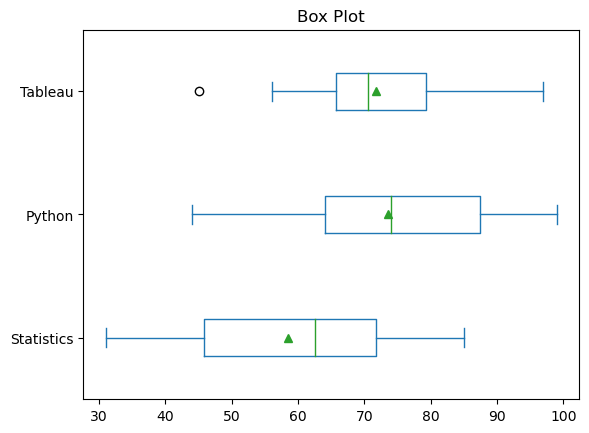

In [10]:
df.plot(kind='box',title='Box Plot',showmeans=True,vert=False);

In [11]:
#Tablue has one lower outlier

In [12]:
from scipy.stats import skew

skewness=[]
Measure=['Skewness']

for col in df.columns:
    skewness.append(round(skew(df[col]),2))
skewness

data4=pd.DataFrame(data=[skewness],columns=['Statistics','Python','Tableau'])
data4.insert(loc=0,column='Measure',value=Measure)
data4

,Measure,Statistics,Python,Tableau
0,Skewness,-0.26,-0.19,0.0


In [13]:
#Statistics and Python have left Skewness whereas Tablue has zero skewness or nomal distribution. It represents measure of asymmetry of distribution.For Statistics measure of asymmetry is higher than Python and Tablue has zero asymmetry

Task 4:

Visually present the distribution of scores obtained by students in different technologies using the appropriate types of charts/graphs.

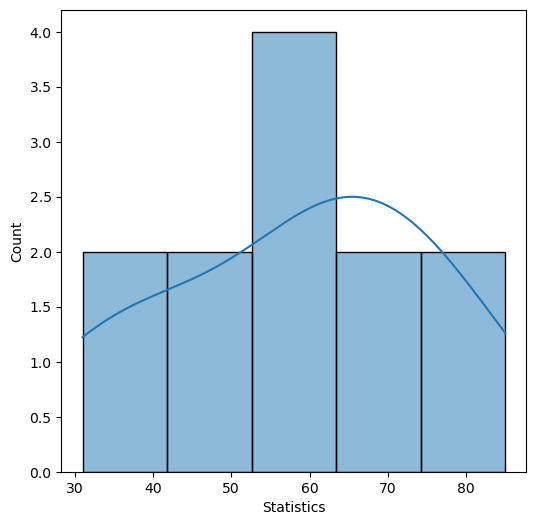

In [14]:
plt.figure(figsize=(6,6))
sb.histplot(df['Statistics'],kde=True)
plt.show()

In [15]:
#This variation in the marks obtained by students in 'Statistics' subject.From tail of the curve, it shows data is suffering from left skeweness

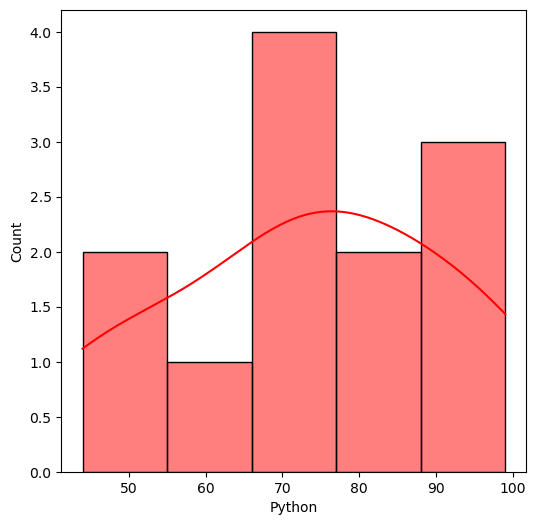

In [16]:
plt.figure(figsize=(6,6))
sb.histplot(x=df['Python'],kde=True,color='red')
plt.show()

In [17]:
#This variation in the marks obtained by students in 'Python' subject.From tail of the curve, it shows data is suffering from left skeweness

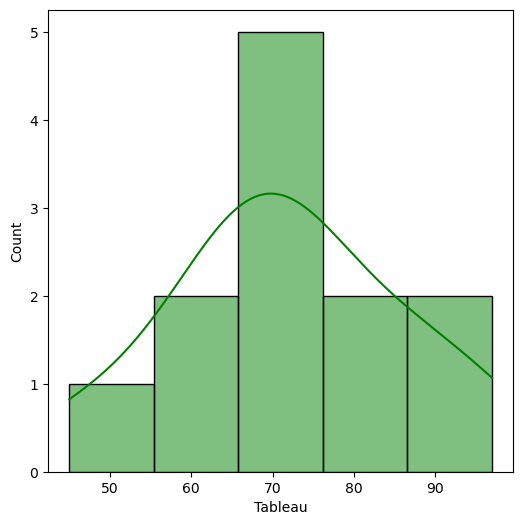

In [18]:
plt.figure(figsize=(6,6))
sb.histplot(x=df['Tableau'],kde=True,color='Green')
plt.show()

In [19]:
#This variation in the marks obtained by students in 'Tableau' subject.It shows data is suffering from zero skeweness

Task 5:

Reveal the types of tails that exist in the distribution of data for each technology using kurtosis and appropriate visualization.

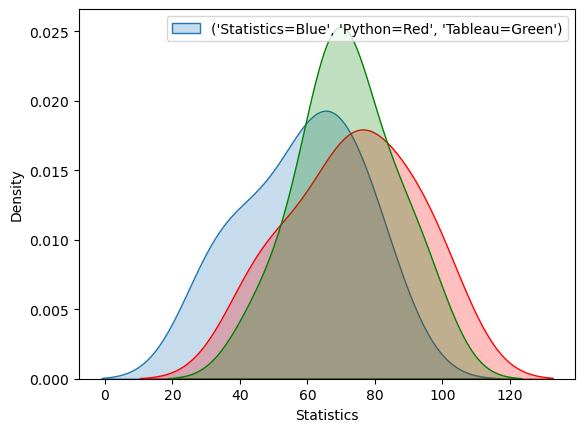

In [26]:
sb.kdeplot(x=df['Statistics'],shade=True,label=(x,y,z));
sb.kdeplot(x=df['Python'],shade=True,color='red');
sb.kdeplot(x=df['Tableau'],shade=True,color='Green');
plt.xlabel='Subject'
x='Statistics=Blue'
y='Python=Red'
z='Tableau=Green'
plt.legend();

In [ ]:
#These graphs estimates probability density function of continuous variable i.e.marks obtained by students in three subjects.Tableau has narrower bandwidth and it is smooth near to its mode(Normal Distribution).Statistics and Python have wider bandwidths and represents left tail

In [40]:
from scipy.stats import kurtosis

k=[]
Measure=['Measure']

for col in df:
    k.append(round(kurtosis(df[col],fisher=False),2))


data5=pd.DataFrame(data=[k],columns=['Statistics','Python','Tableau'])
data5.insert(loc=0,column='Measure',value=Measure)
data5      


,Measure,Statistics,Python,Tableau
0,Measure,1.96,1.98,2.56


In [49]:
#For Python,Statistics & Tableu as Kurtosis<<3 , it is platykurtic

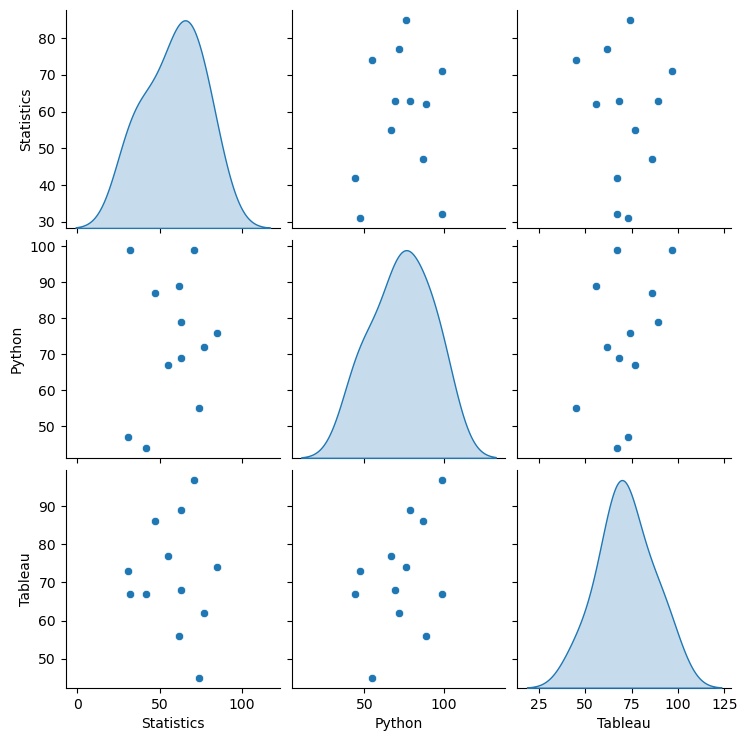

In [43]:
sb.pairplot(df,diag_kind='kde')